## Exploratory Data Analysis with the ```Parat``` Package

by Tino Kanngießer

### Introduction

I really like R but I love Python.

**R** is great for learning statistics and statistical learning. The next model or test is usually only one command or package install away. And the usage of the __[tidyverse](https://www.tidyverse.org/)__ packages allows to write concise code for analysis and visualisation.

Statistics and Statisticsal Learning in R is very graspable since you don't have to fight the code to bring the data in the right shape, apply statistics of interest and extract relevant summary information. This is where R, along with his richness of statistical packages, comes out really strong and is - up to this date - not surpassed.

But the situation is quite different once you want to go beyond calling functions or doing simple data wrangling. 
It can easily get quite complicated to create more sophisticated programming workflows. In addition R is not (and to be fair was never meant to be) a general programming language. This is where **Python** has climbed to the top as versatile, concise and expressive language for machine learning, automation, controlling robots and other areas of interests.

Of course, these statements are very subjective and not to be understood as a degradation. R, along with the Tidyverse and RStudio is very convincing. If you don't familiarise yoursellf with R, you're missing out on a lot of fantastic books about data analysis and statistical learning.

One way to think about effective __[Exploratory Data Analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)__ is to choose a programming language that - to quote Travis Oliphant - fits the brain. For me this is very much true for Python (not implying that there aren't learning plateus for all the subtleties and expressiveness of the language). 

To utilise both Python and R in the same EDA workflow and therefore to play off each other's strengths I wrote the ```parat```  package which will be explained and demonstrated in the following sections.

### The ```parat``` package

```parat``` is an abbreviation for  *python and R as team* (yes I know, it's a little goofy but I kind of liked the name). It's using the fabulous __[RPY2](https://rpy2.bitbucket.io/)__ package as backend. Although quite powerful ```RPY2``` seems to be too low level (for me) to be used effectively in an interactive EDA. In EDA it's all (mostly) all about the flow. 

**Key design decision** 

* simple and clean interface so it fits the brain. 
* R calls are not wrapped to use R in a 'pythonic' way. That means you need to understand how to call R functions which is usually straightforward (remember, that is the convenient part of R)
* a few fundamental building blocks (the most important functions are ```data``` and ```code```)

**Key functions**

```r.data(df=pandas_dataframe, name=name_of_pandas_dataframe)``` ports a pandas dataframe to the R environment <br> 
```r.data(df=None, name=name_of_r_dataframe)``` ports an R dataframe to the Python environment <br> 
```r.code('R code')``` executes arbitrary R code <br> 
```r.code('R code', summary=True)``` executes models, tests, etc in R and get the results back as pandas dataframes <br> 
```r.rdf2pdf``` converts panda dataframe to a dataframes <br>
```r.pdf2rdf``` converts R dataframe to a pandas dataframes with <br>
```r.package``` loads an R package (prerequisite: package has been installed before with Anaconda or conda<br>

## Examples:

Let's start by importing used Python packages:

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Now we import the ```parat``` package. Although not mandatory, I suggest to use the alias r since it's seems logical and is also visually pleasing.

In [16]:
import parat as r

Loading a package is quite easy (prerequisite: the package must have been installed through your Anaconda distribution). Broom has already been loaded when ```parat``` was imported since it's been used to bring R summaries in a dataframe shape.

In [17]:
r.package('broom')

rpy2.robjects.packages.Package as a <module 'broom'>

### Example: Load example dataset in R env and convert to Pandas dataframe

We're loading the famous mtcars dataset which comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

In [18]:
mtcars_r = r.datasets('mtcars')

In [19]:
mtcars_r

mpg,cyl,disp,...,am,gear,carb
21.000000,6.000000,160.000000,...,1.000000,4.000000,4.000000
21.000000,6.000000,160.000000,...,1.000000,4.000000,4.000000
22.800000,4.000000,108.000000,...,1.000000,4.000000,1.000000
21.400000,6.000000,258.000000,...,0.000000,3.000000,1.000000
...,...,...,...,...,...,...
15.800000,8.000000,351.000000,...,1.000000,5.000000,4.000000
19.700000,6.000000,145.000000,...,1.000000,5.000000,6.000000


Now we use parats for the first time by converting the R dataframe to a pandas dataframe.

In [20]:
mtcars_p = r.rdf2pdf(mtcars_r)

In [21]:
mtcars_p.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


Port Pandas dataframe to R environment

In [22]:
r.data(df=mtcars_p, name='mtcars_r')

If only the name is provided as argument, the function will port data from R to the Python environment.

In [23]:
mtcars_r = r.data(df=None, name='mtcars_r')
mtcars_r

mpg,cyl,disp,...,am,gear,carb
21.000000,6.000000,160.000000,...,1.000000,4.000000,4.000000
21.000000,6.000000,160.000000,...,1.000000,4.000000,4.000000
22.800000,4.000000,108.000000,...,1.000000,4.000000,1.000000
21.400000,6.000000,258.000000,...,0.000000,3.000000,1.000000
...,...,...,...,...,...,...
15.800000,8.000000,351.000000,...,1.000000,5.000000,4.000000
19.700000,6.000000,145.000000,...,1.000000,5.000000,6.000000


### Example: Linear Regression with the mtcars dataset

We're loading the famous mtcars dataset which comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

In [24]:
mtcars = r.datasets('mtcars')
mtcars

mpg,cyl,disp,...,am,gear,carb
21.000000,6.000000,160.000000,...,1.000000,4.000000,4.000000
21.000000,6.000000,160.000000,...,1.000000,4.000000,4.000000
22.800000,4.000000,108.000000,...,1.000000,4.000000,1.000000
21.400000,6.000000,258.000000,...,0.000000,3.000000,1.000000
...,...,...,...,...,...,...
15.800000,8.000000,351.000000,...,1.000000,5.000000,4.000000
19.700000,6.000000,145.000000,...,1.000000,5.000000,6.000000


In [25]:
type(mtcars)

rpy2.robjects.vectors.DataFrame

Now we use ```parat``` for the first time by converting the R dataframe to a pandas dataframe.

In [26]:
mtcars_p = r.rdf2pdf(mtcars)
type(mtcars_p)

pandas.core.frame.DataFrame

In [27]:
mtcars_p.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


Once done you can imagine all the Pandas goodnes for data manipulation. Since this is not the focus here we just make all columns uppercase.

In [28]:
mtcars_p.columns = map(str.upper, mtcars_p.columns)

In [29]:
mtcars_p.head()

,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


The transformed dataframe can be ported back to the R environment.

In [30]:
r.data(df=mtcars_p, name='mtcars_r')

And arbitrary R code can be executed. Here we use the glimpse function from the Tidyverse to see the colum names, data types and a few observations.

In [31]:
r.code('glimpse(mtcars_r)')

Observations: 32

Variables: 11

$ MPG  <dbl> 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17...


$ CYL  <dbl> 6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4,...


$ DISP <dbl> 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8,...


$ HP   <dbl> 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, ...


$ DRAT <dbl> 3.90, 3.90, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3....


$ WT   <dbl> 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150,...


$ QSEC <dbl> 16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.00, 22.90,...


$ VS   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...


$ AM   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,...


$ GEAR <dbl> 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3,...


$ CARB <dbl> 4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1,...



### Example: Using a t-test 

In the next example we will get some summary information from R back to Python. We apply a t-test to check if there is a significant difference between mpg for transmission types (p-value of 0.001).

In [32]:
summary, tidy, augment, glance = r.code('t.test(MPG ~ AM, data=mtcars_r)', summary=True)

By setting ```summary=True``` the ```code``` function is using the R __[Broom](https://cran.r-project.org/web/packages/broom/vignettes/broom.html)__  package to turn the output of built-in functions such as lm, nls, or t.test. Then the broomed summaries are turned into pandas data frames.

In [33]:
summary

R object with classes: ('htest',) mapped to:
<ListVector - Python:0x1a25dcafc8 / R:0x7ff6ab846af8>
[FloatVector, FloatVector, FloatVector, FloatVector, ..., FloatVector, StrVector, StrVector, StrVector]
  statistic: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26d3a188 / R:0x7ff6aabe6338>
[-3.767123]
  parameter: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26ceeb88 / R:0x7ff6aabe60d0>
[18.332252]
  p.value: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26b265c8 / R:0x7ff6aabe6220>
[0.001374]
  conf.int: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26d3ec48 / R:0x7ff6aabbd988>
[-11.280194, -3.209684]
  estimate: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26d6ed88 / R:0x7ff6aabbd808>
[17.147368, 24.392308]
  null.value: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26d6ef48 / R:0x7ff6aabe6098>
[0.000000]
  alternative: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1a26b36188 / R:0x7ff6aabd26b8>
['two.sided']
  method: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1a26b36d88 / R:0x7ff6aabe64c0>
['Welch Two Sample t-test']
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1a26d6efc8 / R:0x7ff6aabbfb20>
['MPG by AM']

Since t.test has no **augment** information the augment object returns None.

In [34]:
type(augment)

NoneType

### Example: Linear model

In the last example we're doing a very simple linear regression which of course could easily be done in __[scikit-learn](http://scikit-learn.org/stable/)__ or __[Statsmodels](https://www.statsmodels.org/stable/index.html)__ as well. 
But one can think of more complex issues for which Python does not provide a convenient, out of the box solution (I leave a specific example up to the reader's imagination since everybody has it's own border to crack).

In [35]:
summary, tidy, augment, glance = r.code('fit=lm(MPG ~ WT, data = mtcars_r)', summary=True)

In [36]:
summary

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x1a26b43888 / R:0x7ff6aa5f16e8>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26cfd9c8 / R:0x7ff6aa5e3708>
[37.285126, -5.344472]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26d3e308 / R:0x7ff6a3f30dc0>
[-2.282611, -0.919770, -2.085952, 1.297350, ..., -4.543151, -2.780940, -3.205363, -1.027495]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1a26d46908 / R:0x7ff6a3f30ef0>
[-113.649737, -29.115722, -1.661334, 1.631394, ..., -4.204553, -2.401862, -2.907244, -0.649429]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x1a26d754c8 / R:0x7ff6ab257450>
[2]
...
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x1a26b43888 / R:0x7ff6aa5f16e8>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  qr: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x1a26d92b48 / R:0x7ff6ab21d270>
[RObject, Vector, RObject]
  df.residual: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x1a26d92bc8 / R:0x7ff6ab2455d8>
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x1a26b43888 / R:0x7ff6aa5f16e8>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]

In [37]:
tidy

,term,estimate,std.error,statistic,p.value
1,(Intercept),37.285126,1.877627,19.857575,8.241799e-19
2,WT,-5.344472,0.559101,-9.559044,1.293959e-10


In [38]:
augment.head()

,.rownames,MPG,WT,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
1,Mazda RX4,21.0,2.620,23.282611,0.633580,-2.282611,0.043269,3.067494,0.013274,-0.766168
2,Mazda RX4 Wag,21.0,2.875,21.919770,0.571432,-0.919770,0.035197,3.093068,0.001724,-0.307431
3,Datsun 710,22.8,2.320,24.885952,0.735918,-2.085952,0.058376,3.072127,0.015439,-0.705752
4,Hornet 4 Drive,21.4,3.215,20.102650,0.538442,1.297350,0.031250,3.088268,0.003021,0.432751
5,Hornet Sportabout,18.7,3.440,18.900144,0.552656,-0.200144,0.032922,3.097722,0.000076,-0.066819


In [39]:
glance

,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
1,0.752833,0.744594,3.045882,91.375325,1.293959e-10,2,-80.014714,166.029429,170.426637,278.321938,30


Having the summary information in a tidy format, extracting parameters of interest becomes a breeze.

In [40]:
intercept = tidy.iloc[0, 1]
coefficient = tidy.iloc[1, 1]
print(f'Intercept: {intercept} and Coefficient: {coefficient}')

Intercept: 37.28512616734203 and Coefficient: -5.344471572722678


Finally let's plot the regression line.

In [41]:
x = mtcars_p['WT'].values
y = mtcars_p['MPG'].values

x_fit = mtcars_p['WT'].values 
y_fit = intercept + coefficient * x

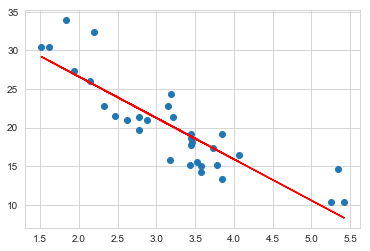

In [42]:
plt.scatter(x ,y);
plt.plot(x_fit, y_fit, c = 'r', linestyle='-', label='regression line');  

## Summary: 
As illustrated the ```parat``` package provides a very simple and easy to understand interface to port dataframes between R and Python, to execute arbitrary R code so R and Python can be used together in one Jupyter notebook for productive **Explanatory Data Analysis**.